# Hypothesis Testing project
**Beibarys Nyussupov, Joseph Tadros, Luke Ducker**

In this project, we demonstrate the essential skills involved in hypothesis testing. To do so, we 
will use a real dataset that stems from a replication attempt of published research [(Wallisch & Whritner, 
2017)](https://github.com/jtad96/hypothesis-testing-project/blob/main/project_guidelines/Data%20analysis%20project%201%20specSheet.pdf.). 

To answer hypothesis testing questions and to cut down false positives, we set the per-test significance level 𝛼 to 0.005 (as per Benjamin et al., 2018). 

## Dataset description:
This dataset features ratings data of 400 movies from 1097 research participants.  
- `1st row: Headers (Movie titles/questions)` – note that the indexing in this list is from 1  

- `Row 2-1098: Responses from individual participants`

- `Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)` 

- `Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)` 

- `Columns 422-464: These columns contain responses to personality questions (1-5)` 

- `Columns 465-474: These columns contain self-reported movie experience ratings (1-5)`

- `Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)`

- `Column 476: Only child (1 = yes, 0 = no, -1 = no response)`

- `Column 477: Movies are best enjoyed alone (1 = yes, 0 = no, -1 = no response)` 

## Questions: 
1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that 
are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]   
2) Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of 
release to contrast movies in terms of whether they are old or new] 
3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently? 
4) What proportion of movies are rated differently by male and female viewers? 
5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings? 
6) What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings 
vs. those without?  
7) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who 
prefer to watch them alone? 
8) What proportion of movies exhibit such a “social watching” effect? 
9) Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?  
10) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana 
Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these 
are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks 
featured in this question to identify the movies that are part of each franchise] 
Extra Credit: Tell us something interesting and true (supported by a significance test of some kind) about the 
movies in this dataset that is not already covered by the questions above [for 5% of the grade score]. 

In [1]:
# useful functions 
# simple significance test interpretation
def significance(alpha, p_value):
    """
    Decide based on alpha. 
    Note: p is the probability, under H0, of observing a statistic at least this extreme.

    """
    if p_value < alpha:
        print(f"p = {p_value:.6g} < α = {alpha} = Reject H0 (statistically significant).")
    else:
        print(f"p = {p_value:.6g} ≥ α = {alpha} = Fail to reject H0 (not statistically significant).")

# cliff's delta for effect size of non-parametric Mann-Whitney U test
def cliffs_delta_from_u(u, n1, n2):
    # SciPy returns U for the first sample. 
    # δ = 2*(U/(n1*n2)) - 1 ; δ>0 = group1 tends to rate higher than group2
    return 2.0 * (u / (n1 * n2)) - 1.0


In [2]:
# libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

# reproducibility 
import random
random.seed(42)
np.random.seed(42)


Let's explore and clean the data before starting any analysis. 

In [3]:
# import the data 
df = pd.read_csv("..\data\movieReplicationSet.csv")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nyuss\AppData\Local\Temp\ipykernel_25684\948917265.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\movieReplicationSet.csv")


In [4]:
# first rows of the data
df.head(5)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [5]:
# check number of null values in each column
print(f'Number of null values in each column:\n{df.isna().sum()}\n')
print(f'Percentage of null values in each column:\n{df.isna().mean()}\n')

Number of null values in each column:
The Life of David Gale (2003)                                              1021
Wing Commander (1999)                                                      1026
Django Unchained (2012)                                                     644
Alien (1979)                                                                808
Indiana Jones and the Last Crusade (1989)                                   634
                                                                           ... 
Movies change my position on social economic or political issues             20
When watching movies things get so intense that I have to stop watching      18
Gender identity (1 = female; 2 = male; 3 = self-described)                   24
Are you an only child? (1: Yes; 0: No; -1: Did not respond)                   0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)            0
Length: 477, dtype: int64

Percentage of null values in each column:
The Life of D

As we can see, most of the columns have a lot of null values - especially for movie ratings. 
It is logical, since some movies might not have been seen by some people in the data. 

However, we can not just remove null values as it will just lead to a loss of huge amounts of data. 
We will have to eliminate null values with element-wise approach, separately in each question. 
Right now it will be easier if we strip all column names from spaces in the beginning and in the end, and lowercase all column names for easier data manipulation.

In [6]:
# strip - removeing spaces in the beginning and in the end
# lower - making all letters in columns names lowercase
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['the life of david gale (2003)', 'wing commander (1999)',
       'django unchained (2012)', 'alien (1979)',
       'indiana jones and the last crusade (1989)', 'snatch (2000)',
       'rambo: first blood part ii (1985)', 'fargo (1996)',
       'let the right one in (2008)', 'black swan (2010)',
       ...
       'when watching a movie i cheer or shout or talk or curse at the screen',
       'when watching a movie i feel like the things on the screen are happening to me',
       'as a movie unfolds i start to have problems keeping track of events that happened earlier',
       'the emotions on the screen "rub off" on me - for instance if something sad is happening i get sad or if something frightening is happening i get scared',
       'when watching a movie i get completely immersed in the alternative reality of the film',
       'movies change my position on social economic or political issues',
       'when watching movies things get so intense that i have to stop watching',
 

## Q4 - What proportion of movies are rated differently by male and female viewers?

### Subset for Q4 + Mann-Whitney U Test (two-sided)

We need to create the subset of the data with columns that we need to answer the question.

We need these columns:
- All movies (index 400)
- Gender identity (index 474)
Column 474: Gender identity (1 = female, 2 = male, 3 = self-described

We have to create 2 groups (female / male) for each movie and conduct non-parametric test. 

We need to use the non-parametric Kolmogorov-Smirnov (KS) test, since we we want to identify proportion of movies that are rated **differently** by male and female viewers. 
We want to understand if male and female ratings come from two different distributions, that is exactly what KS test for. 

First of all, we want to conduct two-tailed test to evaluate the significance of the data. 
If our results are significant, we will compute effect sizes and confidence intervals. 


These are general hypotheses for each movie:

**Null hypothesis (H0):** Female and male movie ratings come from the same distribution. 

**Alternative hypothesis (Ha):** Female and male movie ratings come from different distributions. 

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) by chance if the null hypothesis were true.

If the p-value is smaller than 0.005, it means such a result would be very unlikely by chance under the null hypothesis, so we reject the H0 and conclude that female and male ratings come from different distributions. 

If the p-value is larger than 0.005, then the observed difference could easily occur by random variation, so we fail to reject the H0, meaning data does not provide enough statistical evidence to conclude that the distributions differ. 

In [7]:
# mask for movie columns 
movie_columns = df.iloc[:, list(range(0, 400))].columns

# check movie columns
movie_columns

Index(['the life of david gale (2003)', 'wing commander (1999)',
       'django unchained (2012)', 'alien (1979)',
       'indiana jones and the last crusade (1989)', 'snatch (2000)',
       'rambo: first blood part ii (1985)', 'fargo (1996)',
       'let the right one in (2008)', 'black swan (2010)',
       ...
       'x-men 2 (2003)', 'the usual suspects (1995)', 'the mask (1994)',
       'jaws (1975)', 'harry potter and the chamber of secrets (2002)',
       'patton (1970)', 'anaconda (1997)', 'twister (1996)',
       'macarthur (1977)', 'look who's talking (1989)'],
      dtype='object', length=400)

In [8]:
# check the gender identity column we need
gender_identity = df.iloc[:, 474]
gender_identity.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: gender identity (1 = female; 2 = male; 3 = self-described), dtype: float64

In [10]:
# taking a mask for necessary column
column = "gender identity (1 = female; 2 = male; 3 = self-described)"
alpha = 0.005
# list for movies that have potential significant results. 
significant_movies_gender = []
results_q4_ks = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    females = df.loc[df[column] == 1, movie].dropna()
    males = df.loc[df[column] == 2, movie].dropna()

    # conducting the test 
    d_statistic, p_value = stats.kstest(females, males, alternative='two-sided', )

    # if condition to save significant movies to the list created:#
    if p_value < alpha: 
        # append to significant movies list 
        significant_movies_gender.append(movie)

        # calculate Cliff's delta effect size 
        # save data as well
        results_q4_ks.append({
        "movie": movie,
        "n_female": len(females),
        "n_male": len(males),
        "D": d_statistic,
        "p_value": p_value,
    })
        
    # # use the significance function created 
    # print(f"{movie} Result:")
    # print(f"{significance(0.005, p_value)}\n")

# proportion of movies that had such social effect 
print(f"Proportion of movies that had significant results:{( len(significant_movies_gender) / len(movie_columns) ) * 100}%")
# number of movies that had such effect 
print(f"Number of movies with significant results:{len(significant_movies_gender)}")
# # list of movies 
# for i in significant_movies:
#     print(f"\n{i}\n")


Proportion of movies that had significant results:6.25%
Number of movies with significant results:25


Only 6.25% (25 movies) showed a significant difference in median ratings between female and male viewers. To explore directionality without increasing Type I (False Positives) error and p-hacking, we used descriptive statistics. Before we proceed, we need to look further. 

In [11]:
# convert results to dataframe
df_results = pd.DataFrame(results_q4_ks).copy()

# compare and sort values from increasing to decreasing D statistic
df_results.sort_values(by = ["D"], 
                       ascending= False)





,movie,n_female,n_male,D,p_value
5,divine secrets of the ya-ya sisterhood (2002),55,26,0.403497,0.004219
11,uptown girls (2003),217,25,0.375668,0.002415
4,the proposal (2009),519,79,0.317431,0.000001
17,chicago (2002),196,41,0.304754,0.002720
0,alien (1979),164,115,0.272216,0.000065
19,bend it like beckham (2002),294,78,0.266091,0.000242
12,beauty and the beauty (1991),391,100,0.262174,0.000026
10,10 things i hate about you (1999),481,57,0.250210,0.002673
22,gladiator (2000),174,123,0.238155,0.000437
1,13 going on 30 (2004),565,79,0.230380,0.001016


Here we initially explored using the 2-sample Kolmogorov-Smirnov test to compare full distributions. 
However, because movie ratings are ordinal 1-10, distributions contain a large number of ties, 
and the gender split across movies is highly unbalanced (e.g., 481 females vs 57 males in `10 things i hate about you (1999)` movie), KS becomes very unstable. 

Therefore, Mann-Whitney U is the more appropriate inferential test for this dataset.

These are general hypotheses for each movie, now conducting Mann-Whitney U test. 

**Null hypothesis (H0):** The movie is not rated differently by female and male viewers. 

**Alternative hypothesis (Ha):** The movie is rated differently by female and male viewers. 

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) by chance if the null hypothesis were true.

If the p-value is smaller than 0.005, it means such a result would be very unlikely by chance under the null hypothesis, so we reject the H0 and conclude that there is significant difference in how movies are rated by female and male viewers. 

If the p-value is larger than 0.005, then the observed difference could easily occur by random variation, so we fail to reject the H0, meaning there isn’t enough statistical evidence to say that viewers who identify as females rate the movie differently than viewers who identify as males. 

In [12]:
# taking a mask for necessary column
column = "gender identity (1 = female; 2 = male; 3 = self-described)"
alpha = 0.005
# list for movies that have potential significant results. 
significant_movies_gender = []
results_q4_u = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    females = df.loc[df[column] == 1, movie].dropna()
    males = df.loc[df[column] == 2, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(females, males, alternative='two-sided')

    # if condition to save significant movies to the list created:#
    if p_value < alpha: 
        # append to significant movies list 
        significant_movies_gender.append(movie)

        # compute effect statistics (Cliff's delta)
        delta = cliffs_delta_from_u(u_statistic, 
                                    len(females),
                                    len(males))
        # save data as well
        results_q4_u.append({
        "movie": movie,
        "n_female": len(females),
        "n_male": len(males),
        "U": u_statistic,
        "p_value": p_value,
        "cliffs_delta": delta
    })
        
    # # use the significance function created 
    # print(f"{movie} Result:")
    # print(f"{significance(0.005, p_value)}\n")

# proportion of movies that had such social effect 
print(f"Proportion of movies that had significant results:{( len(significant_movies_gender) / len(movie_columns) ) * 100}%")
# number of movies that had such effect 
print(f"Number of movies with significant results:{len(significant_movies_gender)}")
# # list of movies 
# for i in significant_movies:
#     print(f"\n{i}\n")


Proportion of movies that had significant results:12.5%
Number of movies with significant results:50


With Mann-Whitney U test, 12.5% or 50 movies are rated differently by female and male viewers. 
We consider this result more reliable because the Mann-Whitney U test is more appropriate for ordinal 1-4 ratings and is more robust to unequal group sizes than the KS test.

After determining statistical significance, the next step is to understand how large and practically meaningful these differences are. Statistical significance alone does not tell us the strength of the difference - especially with large or imbalanced samples. That is why we calculated effect size. Effect size quantifies the magnitude of difference between two groups, not just whether the difference exists.

For this study, we use Cliff's delta (δ) as our effect size measure. 

We chose Cliff’s delta because it is specifically appropriate for Mann-Whitney U tests and ordinal rating data, which fits our 1-4 movie rating scale.

Unlike Cohen's d or Hedges g (which assume continuous, normally distributed data), Cliff's delta works directly with rank-based comparisons and does not rely on parametric assumptions. 

It measures the probability that a random value from one group is higher than a random value from another, making it suitable for ordinal or skewed data. 

In this dataset, δ > 0 indicates that females tend to rate the movie higher, while δ < 0 indicates that males tend to rate it higher. 

Interpretation of magnitude follows these thresholds: 
 - |delta| small effect arround 0.11
 - |delta| medium effect around 0.28
 - |delta| large effect around 0.43 
 
This allows us not only to detect which movies ranking differ by gender, but also to understand how meaningful these differences are in real-world interpretation and potential recommendation targeting.
We will filter-out small effects less than 0.28



In [15]:
# convert results to dataframe
df_results_u = pd.DataFrame(results_q4_u).copy()

# filter out negligible effects 
df_results_u_medium_large = df_results_u.loc[abs(round(df_results_u["cliffs_delta"], 2)) > 0.15]

# compare and sort values from decreasing to increasing delta effect size 
df_results_u_medium_large.sort_values(by = ["cliffs_delta"], 
                       ascending= False)





,movie,n_female,n_male,U,p_value,cliffs_delta
17,divine secrets of the ya-ya sisterhood (2002),55,26,1052.5,5.835228e-04,0.472028
14,andaz apna apna (1994),50,23,844.0,1.264299e-03,0.467826
26,the firm (1993),48,26,909.0,1.132727e-03,0.456731
29,uptown girls (2003),217,25,3848.5,4.978236e-04,0.418802
20,can't hardly wait (1998),69,26,1258.5,2.335726e-03,0.403010
11,funny girl (1968),106,29,2091.5,2.622892e-03,0.360768
16,girl interrupted (1999),195,28,3710.5,1.648810e-03,0.359158
15,the proposal (2009),519,79,27821.5,1.602214e-07,0.357113
38,chicago (2002),196,41,5414.0,3.694106e-04,0.347437
41,bend it like beckham (2002),294,78,15340.0,3.207870e-06,0.337868


In [17]:
# filter out small effects 
df_results_u_small = df_results_u.loc[abs(round(df_results_u["cliffs_delta"], 2)) < 0.33]

# compare and sort values from decreasing to increasing delta effect size 
df_results_u_small.sort_values(by = ["cliffs_delta"], 
                       ascending= False)





,movie,n_female,n_male,U,p_value,cliffs_delta
32,the holiday (2006),229,36,5417.0,2.102445e-03,0.314168
6,13 going on 30 (2004),565,79,29167.5,6.916496e-06,0.306934
30,beauty and the beauty (1991),391,100,25545.0,8.920452e-07,0.306650
18,ghostbusters (2016),289,99,18333.0,2.364462e-05,0.281535
31,knight and day (2010),140,54,4838.0,2.200775e-03,0.279894
35,grease (1978),523,119,39647.5,1.986581e-06,0.274081
19,cheaper by the dozen (2003),540,135,45342.0,8.660131e-06,0.243951
22,room (2015),239,56,8245.5,4.408124e-03,0.232143
8,clueless (1995),558,70,24036.0,1.254298e-03,0.230722
49,harry potter and the chamber of secrets (2002),633,203,78790.0,3.930701e-07,0.226313


**Interpretation of Gender-Based Effect Sizes:**
- Using Cliff's delta, we identified which movies show practically meaningful gender-based preference differences.
- Movies with medium-to-large effect sizes (|δ| ≥ 0.28 and |δ| ≥ 0.43) show strong preference separation between genders. 
- For these films, the likelihood that one gender consistently rates the movie higher is meaningfully large - these can be leveraged in recommendation systems for audience-specific targeting.

**Insights:**
- Positive δ ≥ 0.28 = Female viewers prefer these films noticeably more.
These titles are mostly relationship-driven or emotionally centered films.

- Negative δ ≤ -0.28 = Male viewers prefer these significantly more.
- These films tend to be action, war, thrillers, or darker intensity thematic content.

- Movies with small effect sizes (|δ| between 0.10 and 0.27) show weaker differences that, while statistically detectable, do not result in strong separation in preference. 
- These titles can be considered more universal recommendations, suitable for mixed audiences without heavy gender bias in reception.

**Practical Value:**
- This approach lets us move beyond just “significant vs not” and quantify relevance. Cliff's delta directly tells us how strongly preferences diverge or converge between genders. This makes it possible to translate statistical results into actionable strategies for personalization, audience segmentation, and targeted content recommendations - using non-parametric effect sizes that align with the ordinal nature of the rating scale.

## Q6 - What proportion of movies exhibit an “only child effect”, i.e. are rated differently by viewers with siblings vs. those without?  

### Subset for Q6 + Mann-Whitney U Test (two-sided)

We need to create the subset of the data with columns that we need to answer the question.

We need these columns:
- All movies (index 400)
- only child/with siblings
Column 476: Only child (1 = yes, 0 = no, -1 = no response)

We have to create 2 groups (only child / not only child ) for each movie and conduct non-parametric test. 

Here we also need to use the non-parametric Mann-Whitney U Test, since earlier we identified that Mann-Whitney U test will be more relevant for potential group unbalanced and ordinal data. 

First we will conduct a two-tail test to identify movies that have any significant difference. 

After that we will test the directionality of significant movies by looking at Cliff's delta effect size used before. 


These are general hypotheses for each movie:

**Null hypothesis (H0):** The movie is not rated differently by wievers with siblings and without siblings. 

**Alternative hypothesis (Ha):** The movie is rated differently by viwers with siblings and without siblings. 

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) by chance if the null hypothesis were true.

If the p-value is smaller than 0.005, it means such a result would be very unlikely by chance under the null hypothesis, so we reject the H0 and conclude that there is significant difference in how movies are rated by viewers with siblings and without on median level. 

If the p-value is larger than 0.005, then the observed difference could easily occur by random variation, so we fail to reject the H0, meaning there isn’t enough statistical evidence to say that viewers without siblings rate movie differently than viewers with siiblings. 

In [18]:
# mask for movie columns 
movie_columns = df.iloc[:, list(range(0, 400))].columns

# check movie columns
movie_columns

Index(['the life of david gale (2003)', 'wing commander (1999)',
       'django unchained (2012)', 'alien (1979)',
       'indiana jones and the last crusade (1989)', 'snatch (2000)',
       'rambo: first blood part ii (1985)', 'fargo (1996)',
       'let the right one in (2008)', 'black swan (2010)',
       ...
       'x-men 2 (2003)', 'the usual suspects (1995)', 'the mask (1994)',
       'jaws (1975)', 'harry potter and the chamber of secrets (2002)',
       'patton (1970)', 'anaconda (1997)', 'twister (1996)',
       'macarthur (1977)', 'look who's talking (1989)'],
      dtype='object', length=400)

In [19]:
# checking the needed column 
n_child = df.iloc[:, 475]
n_child.value_counts()


are you an only child? (1: yes; 0: no; -1: did not respond)
 0    894
 1    177
-1     26
Name: count, dtype: int64

In [ ]:
# taking a mask for necessary column
column = "are you an only child? (1: yes; 0: no; -1: did not respond)"
alpha = 0.005

# list for movies that have potential significant results. 
significant_movies_child = []
results_q6_u = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    only_child = df.loc[df[column] == 1, movie].dropna()
    not_only_child = df.loc[df[column] == 0, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(only_child, not_only_child, alternative='two-sided')

    # if condition to save significant movies to the list created:#
    if p_value < alpha: 
        # append to significant movies list 
        significant_movies_child.append(movie)

        # compute effect statistics (Cliff's delta)
        delta = cliffs_delta_from_u(u_statistic, 
                                    len(only_child),
                                    len(not_only_child))
        # save data as well
        results_q6_u.append({
        "movie": movie,
        "n_only_child": len(only_child),
        "n_not_only_child": len(not_only_child),
        "U": u_statistic,
        "p_value": p_value,
        "cliffs_delta": delta
    })
        
    # # use the significance function created 
    # print(f"{movie} Result:")
    # print(f"{significance(0.005, p_value)}\n")

# proportion of movies that had such social effect 
print(f"Proportion of movies that had significant results:{round(( len(significant_movies_child) / len(movie_columns) ) * 100, 2)}%")
# number of movies that had such effect 
print(f"Number of movies with significant results:{len(significant_movies_child)}")
# # list of movies 
# for i in significant_movies:
#     print(f"\n{i}\n")

Proportion of movies that had significant results:1.75%
Number of movies with significant results:7


We can see that only few (1.75% - 7) movies have any significant difference in ratings of viewers with and without siblings. 
We can test for directionality now by looking at coefficients of Cliff's delta. 

After determining statistical significance, the next step is to understand how large and practically meaningful these differences are. Statistical significance alone does not tell us the strength of the difference - especially with large or imbalanced samples. That is why we calculated effect size. Effect size quantifies the magnitude of difference between two groups, not just whether the difference exists.

For this study, we use Cliff's delta (δ) as our effect size measure. 

We chose Cliff’s delta because it is specifically appropriate for Mann-Whitney U tests and ordinal rating data, which fits our 1-4 movie rating scale.

Unlike Cohen's d or Hedges g (which assume continuous, normally distributed data), Cliff's delta works directly with rank-based comparisons and does not rely on parametric assumptions. 

It measures the probability that a random value from one group is higher than a random value from another, making it suitable for ordinal or skewed data. 

In this dataset, δ > 0 indicates that viewers who are only child tend to rate the movie higher, while δ < 0 indicates that viewers with siblings tend to rate the movie higher. 

Interpretation of magnitude follows these thresholds: 
 - |delta| small effect arround 0.11
 - |delta| medium effect around 0.28
 - |delta| large effect around 0.43 
 
This allows us not only to detect which movies ranking differ by number of children in family, but also to understand how meaningful these differences are in real-world interpretation and potential recommendation targeting.
We will filter-out small effects less than 0.28

In [22]:
# convert results to dataframe
df_results_q6 = pd.DataFrame(results_q6_u).copy()

# filter out small effects 
df_results_q6_medium_large = df_results_q6.loc[abs(round(df_results_q6["cliffs_delta"], 2)) >= 0.28]

# compare and sort values from decreasing to increasing delta effect size 
df_results_q6_medium_large.sort_values(by = ["cliffs_delta"], 
                       ascending= False)



,movie,n_only_child,n_not_only_child,U,p_value,cliffs_delta
0,billy madison (1995),43,224,3226.5,0.000538,-0.330046
2,happy gilmore (1996),36,266,3196.5,0.001075,-0.332393
1,the blue lagoon (1980),28,135,1200.5,0.002135,-0.364815
5,feardotcom (2002),12,44,123.0,0.004604,-0.534091


In [75]:
# convert results to dataframe
df_results_q6 = pd.DataFrame(results_q6_u).copy()

# filter including small effects 
df_results_q6_small = df_results_q6.loc[abs(round(df_results_q6["cliffs_delta"], 2)) < 0.28]

# compare and sort values from decreasing to increasing delta effect size 
df_results_q6_small.sort_values(by = ["cliffs_delta"], 
                       ascending= False)



,movie,n_only_child,n_not_only_child,U,p_value,cliffs_delta
6,captain america: civil war (2016),104,431,18403.5,0.003736,-0.178855
3,american pie (1999),75,367,10903.0,0.004168,-0.207775
4,star wars: episode vi - the return of the jedi...,72,378,10705.0,0.003346,-0.213330


**Interpretation of Only-Child effect sizes:**
- Using Cliff's delta, we identified which movies show practically meaningful preference differences between only-children and non-only-children viewers. 
- Movies with medium-to-large effect sizes (|δ| ≥ 0.28) demonstrate strong preference separation between these two groups. 
- For these films, the probability that one group consistently rates the movie higher is meaningfully large - these films carry the most value for audience-specific targeting signals based on childhood sibling background.

**Insights:**
- Negative δ <= -0.28 = Non-only-children prefer these films noticeably more.
- Billy Madison, Happy Gilmore, The Blue Lagoon, Feardotcom all fall in this range with medium-to-large effects.
- Specifically, Feardotcom with -0.53 large effect size.
-
- Movies with small effect sizes (|δ| between 0.10 and 0.27) show weaker differences that, while statistically detectable, do not result in strong separation in preference.
- Examples: Captain America: Civil War, American Pie, Star Wars Episode VI
These titles are closer to being universal in terms of preference.

**Practical Value:**
This classification allows us to move beyond just detecting significance and instead quantify the practical magnitude of difference. 

Cliff's delta provides a non-parametric effect size directly appropriate for the Mann-Whitney U test and the 1-4 ordinal rating scale, allowing us to convert the statistical results into meaningful insight for segmentation, personalization strategy, and recommendation optimization - this time using only-child vs not-only-child as a demographic dimension.

## Q7 - Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone? 

## Q8 - What proportion of movies exhibit such a “social watching” effect? 


### Subset for Q8 + Mann-Whitney U Test (two-sided)

As in previous questions, we will use Mann-Whitney U test. 
We need to create a subset of data for variables that are needed. 

We need these columns:
- All movies (index 400)
- social watcher / alone watchers (index 476)

These are general hypotheses for each movie:

**Null hypothesis (H0):** The median rating of the movie is the same for social and alone watchers. 

**Alternative hypothesis (Ha):** The median rating of the movie movie is significantly different between social and alone watchers.

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) if the null hypothesis were true.

If the p-value is smaller than 0.005, it means such a result would be very unlikely under the null hypothesis, so we reject the H0 and conclude that there is significant difference in median rating for specific movie between social and alone watchers. If that is the case, we will analyze effect size using Cliff's delta. 

If the p-value is larger than 0.005, then the observed difference could easily occur by random variation, so we fail to reject the H0, meaning there isn’t enough statistical evidence to say social watchers median rating for specific movie is different than the median rating of alone watchers. 

In [23]:
# mask for movie columns 
movie_columns = df.iloc[:, list(range(0, 400))].columns

# check movie columns
movie_columns

Index(['the life of david gale (2003)', 'wing commander (1999)',
       'django unchained (2012)', 'alien (1979)',
       'indiana jones and the last crusade (1989)', 'snatch (2000)',
       'rambo: first blood part ii (1985)', 'fargo (1996)',
       'let the right one in (2008)', 'black swan (2010)',
       ...
       'x-men 2 (2003)', 'the usual suspects (1995)', 'the mask (1994)',
       'jaws (1975)', 'harry potter and the chamber of secrets (2002)',
       'patton (1970)', 'anaconda (1997)', 'twister (1996)',
       'macarthur (1977)', 'look who's talking (1989)'],
      dtype='object', length=400)

In [24]:
# checking the needed column 
social_column = df.iloc[:, 476]
social_column.value_counts()


movies are best enjoyed alone (1: yes; 0: no; -1: did not respond)
 1    610
 0    462
-1     25
Name: count, dtype: int64

In [37]:
# taking a mask for necessary column
column = "movies are best enjoyed alone (1: yes; 0: no; -1: did not respond)"
alpha = 0.005

# list for movies that have potential significant results. 
significant_movies_social = []
results_q8_u = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    social_watchers = df.loc[df[column] == 0, movie].dropna()
    alone_watchers = df.loc[df[column] == 1, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(social_watchers, alone_watchers, alternative='greater')

    # if condition to save significant movies to the list created:
    if p_value < alpha: 
        # append to significant movies list 
        significant_movies_social.append(movie)

        # compute effect statistics (Cliff's delta)
        delta = cliffs_delta_from_u(u_statistic, 
                                    len(social_watchers),
                                    len(alone_watchers))
        # save data as well
        results_q8_u.append({
        "movie": movie,
        "n_only_child": len(social_watchers),
        "n_not_only_child": len(alone_watchers),
        "U": u_statistic,
        "p_value": p_value,
        "cliffs_delta": delta
    })
        
    # # use the significance function created 
    # print(f"{movie} Result:")
    # print(f"{significance(0.005, p_value)}\n")

# proportion of movies that had such social effect 
print(f"Proportion of movies that had significant results:{round(( len(significant_movies_social) / len(movie_columns) ) * 100, 2)}%")
# number of movies that had such effect 
print(f"Number of movies with significant results:{len(significant_movies_social)}")
# list of movies 
for i in significant_movies_social:
    print(f"\n{i}\n")

Proportion of movies that had significant results:1.5%
Number of movies with significant results:6

north (1994)


shrek 2 (2004)


the avengers (2012)


spider-man (2002)


the transporter (2002)


captain america: civil war (2016)



We can see that only few (2.5% - 10) movies have any significant difference in median ratings of social or alone watchers. 
We can test for directionality now by looking at coefficients of Cliff's delta. 

After determining statistical significance, the next step is to understand how large and practically meaningful these differences are. Statistical significance alone does not tell us the strength of the difference - especially with large or imbalanced samples. That is why we calculated effect size. Effect size quantifies the magnitude of difference between two groups, not just whether the difference exists.

For this study, we use Cliff's delta (δ) as our effect size measure. 

We chose Cliff’s delta because it is specifically appropriate for Mann-Whitney U tests and ordinal rating data, which fits our 1-4 movie rating scale.

Unlike Cohen's d or Hedges g (which assume continuous, normally distributed data), Cliff's delta works directly with rank-based comparisons and does not rely on parametric assumptions. 

It measures the probability that a random value from one group is higher than a random value from another, making it suitable for ordinal or skewed data. 

In this dataset, δ > 0 indicates that viewers who are only child tend to rate the movie higher, while δ < 0 indicates that viewers with siblings tend to rate the movie higher. 

Interpretation of magnitude follows these thresholds: 
 - |delta| small effect arround 0.11
 - |delta| medium effect around 0.28
 - |delta| large effect around 0.43 
 
This allows us not only to detect which movies ranking differ by social behavior, but also to understand how meaningful these differences are in real-world interpretation and potential recommendation targeting.
We will filter-out small effects less than 0.28

In [35]:
# convert results to dataframe
df_results_q8 = pd.DataFrame(results_q8_u).copy()

# filter out small effects 
df_results_q8_medium_large = df_results_q8.loc[abs(round(df_results_q8["cliffs_delta"], 2)) >= 0.28]

# compare and sort values from decreasing to increasing delta effect size 
df_results_q8_medium_large.sort_values(by = ["cliffs_delta"], 
                       ascending= False)



,movie,n_only_child,n_not_only_child,U,p_value,cliffs_delta
1,north (1994),39,35,942.0,0.004696,0.380220
6,donnie darko (2001),94,149,5051.5,0.000198,-0.278666


In [36]:
# filter including small effects 
df_results_q8_small = df_results_q8.loc[abs(round(df_results_q8["cliffs_delta"], 2)) < 0.28]

# compare and sort values from decreasing to increasing delta effect size 
df_results_q8_small.sort_values(by = ["cliffs_delta"], 
                       ascending= False)



,movie,n_only_child,n_not_only_child,U,p_value,cliffs_delta
8,the transporter (2002),92,99,5619.0,0.004666,0.233860
9,captain america: civil war (2016),243,293,41362.0,0.000950,0.161870
3,shrek 2 (2004),410,535,124562.0,0.000280,0.135737
4,the avengers (2012),340,412,78946.0,0.001998,0.127156
5,spider-man (2002),367,459,94401.0,0.002359,0.120799
2,inglorious bastards (2009),168,257,18197.0,0.004998,-0.157078
0,the silence of the lambs (1991),203,291,24344.5,0.000554,-0.175783
7,apocalypse now (1979),69,98,2498.5,0.003731,-0.261017


**Do movies show a “social watching” effect?**
- Yes - but only some of them. 
- While multiple movies were statistically significant, not all differences were practically meaningful. 
- When we evaluate using Cliff's delta, only movies with medium-to-large effect size (|δ| ≥ 0.28) actually demonstrate a real social watching effect.
-
- Movies like North (1994) (δ = 0.38) and Donnie Darko (2001) (δ = ~-0.28) show meaningful separation between social and alone watchers, indicating that the social behavior affects the enjoyment of these movies. 
- Smaller effect movies (|δ| 0.10-0.27) are statistically different, but the magnitude is too weak to consider them “social effect” movies. These films are closer to universal preference and should not be used for any recommendations. 



## Q9 - Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?  


### Subset for Q9

First, we need to create the subset of the data with columns that we need to answer the question.
We need 2 columns to anwer the question:
1)  ‘Home Alone (1990)’ 
2) ‘Finding Nemo (2003)’ 

In [38]:
# apply previous function to the dataset and create the subset 
# taking filter mask for necessary columns
columns_q9 = ["home alone (1990)", 
           "finding nemo (2003)"]

# subset with 2 columns: 
q9_df = df.loc[:, columns_q9].copy()

# first 5 rows of the subset
q9_df.head(5)

,home alone (1990),finding nemo (2003)
0,4.0,3.5
1,4.0,4.0
2,4.0,3.5
3,1.5,2.5
4,2.0,2.5


Since we now successfully created subset of the data for question, 
we can divide the data into two series groups, while also droping null values in each group.
1) Home Alone (1990) movie
2) Finding Nemo (2003) movie

In [39]:
# columns with names of the movies
col_alone = columns_q9[0]
col_nemo = columns_q9[1]

# Home alone movie 
home_alone = q9_df[col_alone].dropna()
# Finding Nemo movie
finding_nemo = q9_df[col_nemo].dropna()

In [114]:
# number of rows in each series 
print(f"Number of ratings that Home Alone movie has:{home_alone.shape[0]} rows")
print(f"Number of ratings that Finding Nemo movie has:{finding_nemo.shape[0]} rows")

Number of ratings that Home Alone movie has:857 rows
Number of ratings that Finding Nemo movie has:1014 rows


Both movies have equal numbers of rows, so we can proceed with the analysis. 

### Distributions

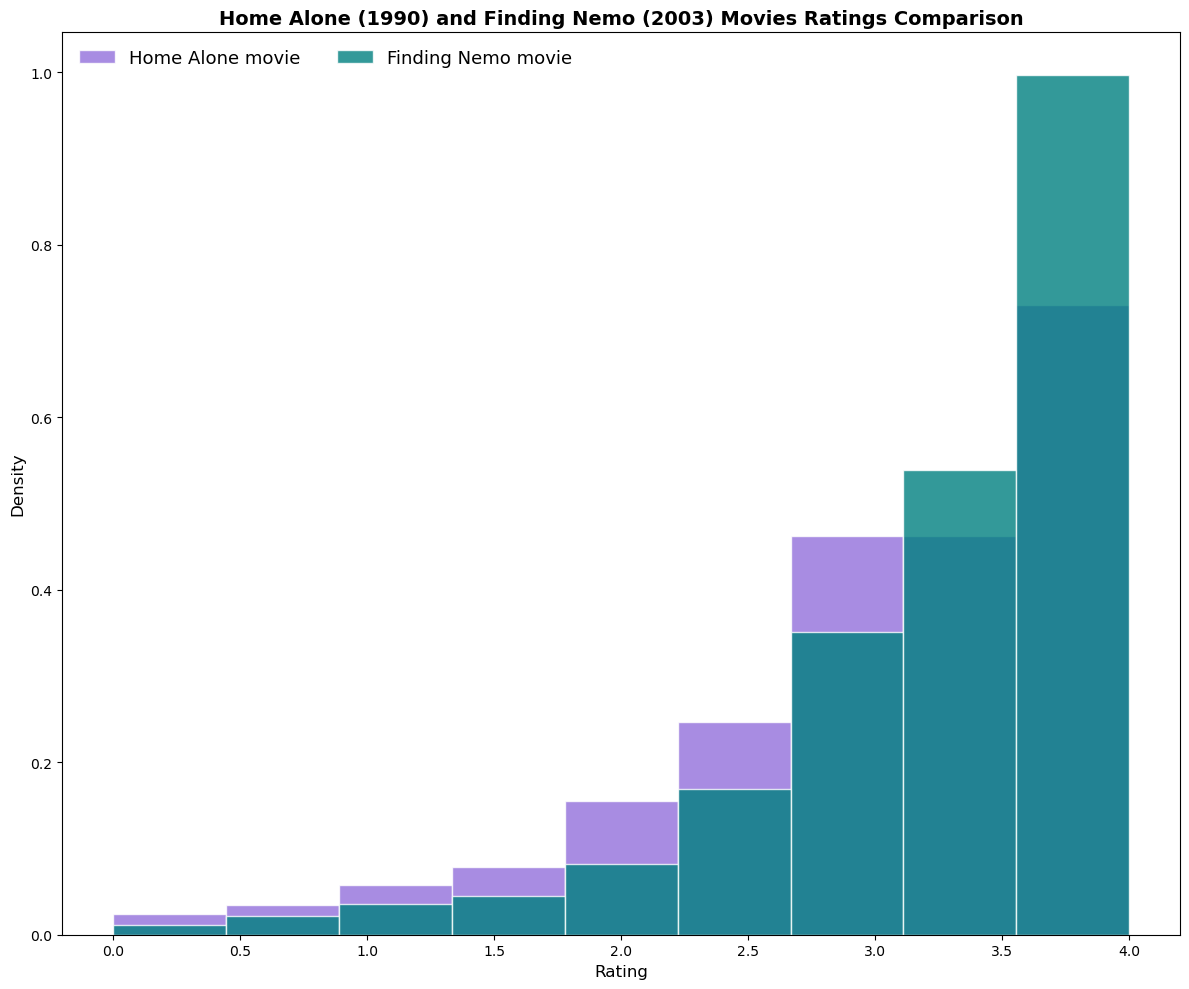

In [118]:
# preparing the graph
plt.figure(figsize= (12, 10))

# graph
# histograpms
plt.hist(home_alone, bins=9, color="mediumpurple", edgecolor="white", alpha=0.8, density = True)
plt.hist(finding_nemo, bins=9, color="teal", edgecolor="white", alpha=0.8, density = True)

# aesthetics
plt.title("Home Alone (1990) and Finding Nemo (2003) Movies Ratings Comparison", fontsize=14, fontweight = "bold")

# axes
plt.xlabel("Rating", fontsize = 12)
plt.ylabel("Density", fontsize = 12)


# legend
plt.legend(["Home Alone movie", 
            "Finding Nemo movie"], 
            fontsize = 13,
            loc = "upper left", 
            ncol = 2,
            bbox_to_anchor = (0, 1),
            frameon = False)

# show 
plt.tight_layout()
plt.show()


Both movies show a strong left-skewed distribution, meaning most viewers rated them on the higher end of the scale. However, the difference in height and shape between the bars suggests that Finding Nemo (2003) generally received higher and more consistent ratings than Home Alone (1990). The tallest bars for Finding Nemo at the 4.0 rating level show that a much larger share of people gave it top marks, while Home Alone ratings are slightly more spread between 2.0 and 3.5. The density plot reinforces this - Finding Nemo’s curve rises sharply and dominates across higher rating bins, indicating that its ratings are both more concentrated and more favorable overall. In short, both films were well liked, but Finding Nemo stands out as being more universally enjoyed and consistently rated higher.

We need to test that statistically. 

### Kolmogorov - Smirnov (KS) test

The question asks about a difference in distributions, not which movie is rated higher.
The KS test compares the entire shapes of the two distributions - it checks whether they come from the same underlying population, considering not just medians but also spread, skewness, and overall distributional form.

These are hypotheses for this test:

**Null hypothesis (H0):** The ratings distribution of Home Alone (1990) is the same as that of Finding Nemo (2003)

**Alternative hypothesis (Ha):** The ratings distribution of Home Alone (1990) differs from that of Finding Nemo (2003)

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) if the null hypothesis were true.


In [40]:
# conduct the test with statistic and p-values
u_statistic, p_value = stats.kstest(home_alone, finding_nemo, alternative='two-sided')

# usage
significance(0.005, p_value)

p = 6.3794e-10 < α = 0.005 = Reject H0 (statistically significant).


Since the p-value (6.3794e-10) is far smaller than the significance level α = 0.005, we reject the null hypothesis. This result is statistically significant, meaning the difference in rating distributions between Home Alone (1990) and Finding Nemo (2003) is extremely unlikely to have occurred by random chance. In practical terms, this indicates that the two movies come from different distributions. 
